#Import

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm


plt.rcParams['figure.facecolor']='w'

In [0]:
from sklearn.model_selection import train_test_split 
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.pipeline import Pipeline


In [155]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=False)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
retail = '/content/gdrive/My Drive/Unit 1/Project 1/1000mlRetail.csv'
retail_df_original = pd.read_csv(retail,parse_dates=['Order Date', 'Ship Date'])

In [0]:
retail_df = retail_df_original

#Setting up retail_df

In [0]:
#removing some unnessesary columns
retail_df = retail_df_original.drop(['Customer ID','Customer Name','Postal Code','Order ID','Ship Date','Order Priority','Region','City','State','Ship Mode','Shipping Cost','Segment'],axis=1)

In [159]:
retail_df.head()

,Row ID,Order Date,Country,Market,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,32298,2016-07-31,United States,US,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845
1,26341,2017-02-05,Australia,APAC,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650
2,25330,2017-10-17,Australia,APAC,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710
3,13524,2017-01-28,Germany,EU,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400
4,47221,2017-11-05,Senegal,Africa,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200


In [160]:
retail_df.nunique()

Row ID          51290
Order Date       1430
Country           147
Market              7
Product ID      10292
Category            3
Sub-Category       17
Product Name     3788
Sales           22995
Quantity           14
Discount           27
Profit          24575
dtype: int64

In [161]:
retail_df.shape

(51290, 12)

In [162]:
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 12 columns):
Row ID          51290 non-null int64
Order Date      51290 non-null datetime64[ns]
Country         51290 non-null object
Market          51290 non-null object
Product ID      51290 non-null object
Category        51290 non-null object
Sub-Category    51290 non-null object
Product Name    51290 non-null object
Sales           51290 non-null float64
Quantity        51290 non-null int64
Discount        51290 non-null float64
Profit          51290 non-null float64
dtypes: datetime64[ns](1), float64(3), int64(2), object(6)
memory usage: 4.7+ MB


In [163]:
retail_df.head()

,Row ID,Order Date,Country,Market,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,32298,2016-07-31,United States,US,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845
1,26341,2017-02-05,Australia,APAC,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650
2,25330,2017-10-17,Australia,APAC,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710
3,13524,2017-01-28,Germany,EU,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400
4,47221,2017-11-05,Senegal,Africa,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200


In [164]:
retail_df[retail_df['Profit']<0].head()

,Row ID,Order Date,Country,Market,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
1,26341,2017-02-05,Australia,APAC,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650
3,13524,2017-01-28,Germany,EU,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400
9,40936,2016-01-28,United States,US,FUR-TA-10000198,Furniture,Tables,Chromcraft Bull-Nose Wood Oval Conference Tabl...,4297.644,13,0.4,-1862.3124
30,220,2015-12-28,Dominican Republic,LATAM,TEC-PH-10002815,Technology,Phones,"Samsung Smart Phone, VoIP",1696.640,5,0.2,-148.4600
32,32735,2016-10-15,United States,US,FUR-CH-10002024,Furniture,Chairs,HON 5400 Series Task Chairs for Big and Tall,2453.430,5,0.3,-350.4900


##Adding columns

In [0]:
#add the cost of goods sold column
retail_df['CoGS']= round((retail_df['Sales']- retail_df['Profit']),4)

In [0]:
#add the profit ratio column
retail_df['Profit Ratio']= round((retail_df['Profit']/ retail_df['Sales']),2)

In [0]:
#add the discount amouont column
retail_df['Discount Amount']= round((retail_df['Sales']/ (1-retail_df['Discount'])*retail_df['Discount']),2)

In [0]:
#add individual item price column
retail_df['Indv Sale'] = round((retail_df['Sales']/ retail_df['Quantity']),2)

In [0]:
#add unit price column
retail_df['Unit Price'] = retail_df['CoGS']/ retail_df['Quantity']

In [0]:
retail_df=retail_df[retail_df['Order Date'].dt.year==2018]

In [0]:
retail_df['Profit Margin'] =  (retail_df['Indv Sale']/(1-retail_df['Discount']) - retail_df['Unit Price'])/retail_df['Unit Price']

#Split into Categories

In [0]:
#create seperate dfs for each category
retail_tec_df = retail_df[(retail_df['Category']=='Technology')]
retail_fur_df = retail_df[(retail_df['Category']=='Furniture')]
retail_off_df = retail_df[(retail_df['Category']=='Office Supplies')]

In [172]:
retail_tec_df.head()

,Row ID,Order Date,Country,Market,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,CoGS,Profit Ratio,Discount Amount,Indv Sale,Unit Price
16,36178,2018-11-03,United States,US,TEC-AC-10004145,Technology,Accessories,Logitech diNovo Edge Keyboard,2249.910,9,0.0,517.4793,1732.4307,0.23,0.00,249.99,192.4923
18,22096,2018-01-31,Australia,APAC,TEC-CO-10000865,Technology,Copiers,"Brother Fax Machine, High-Speed",2565.594,9,0.1,28.4040,2537.1900,0.01,285.07,285.07,281.9100
24,1570,2018-07-31,Mexico,LATAM,TEC-PH-10004182,Technology,Phones,"Motorola Smart Phone, Full Size",1713.840,4,0.0,445.5200,1268.3200,0.26,0.00,428.46,317.0800
37,31980,2018-11-05,United States,US,TEC-MA-10004125,Technology,Machines,Cubify CubeX 3D Printer Triple Head Print,7999.980,4,0.5,-3839.9904,11839.9704,-0.48,7999.98,2000.00,2959.9926
38,15380,2018-01-14,United Kingdom,EU,TEC-CO-10000013,Technology,Copiers,"Brother Fax Machine, Laser",4141.020,13,0.0,1697.6700,2443.3500,0.41,0.00,318.54,187.9500


In [173]:
retail_fur_df.head()

,Row ID,Order Date,Country,Market,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,CoGS,Profit Ratio,Discount Amount,Indv Sale,Unit Price
25,3484,2018-09-05,El Salvador,LATAM,FUR-TA-10002827,Furniture,Tables,"Hon Computer Table, Fully Assembled",2106.496,8,0.2,526.496,1580.00,0.25,526.62,263.31,197.50
42,25795,2018-09-26,India,APAC,FUR-BO-10004852,Furniture,Bookcases,"Sauder Classic Bookcase, Traditional",5667.870,13,0.0,2097.030,3570.84,0.37,0.00,435.99,274.68
47,24341,2018-08-28,China,APAC,FUR-CH-10000602,Furniture,Chairs,"Novimex Executive Leather Armchair, Red",2761.200,6,0.0,110.340,2650.86,0.04,0.00,460.20,441.81
49,6550,2018-12-18,Uruguay,LATAM,FUR-CH-10000891,Furniture,Chairs,"Harbour Creations Executive Leather Armchair, ...",3473.140,11,0.0,868.120,2605.02,0.25,0.00,315.74,236.82
60,26634,2018-03-11,Bangladesh,APAC,FUR-BO-10001073,Furniture,Bookcases,"Safco Classic Bookcase, Metal",3063.270,7,0.0,581.910,2481.36,0.19,0.00,437.61,354.48


In [174]:
retail_off_df.head()

,Row ID,Order Date,Country,Market,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,CoGS,Profit Ratio,Discount Amount,Indv Sale,Unit Price
8,40155,2018-10-14,United States,US,OFF-BI-10003527,Office Supplies,Binders,Fellowes PB500 Electric Punch Plastic Comb Bin...,5083.960,5,0.2,1906.485,3177.475,0.38,1270.99,1016.79,635.495
15,13779,2018-07-31,France,EU,OFF-AP-10000423,Office Supplies,Appliances,"Breville Refrigerator, Red",1869.588,4,0.1,186.948,1682.640,0.10,207.73,467.40,420.660
17,12069,2018-09-08,Italy,EU,OFF-AP-10004512,Office Supplies,Appliances,"Hoover Stove, Red",7958.580,14,0.0,3979.080,3979.500,0.50,0.00,568.47,284.250
19,49463,2018-12-05,Tanzania,Africa,OFF-KIT-10004058,Office Supplies,Appliances,"KitchenAid Stove, White",3409.740,6,0.0,818.280,2591.460,0.24,0.00,568.29,431.910
58,23499,2018-08-05,Australia,APAC,OFF-AP-10002244,Office Supplies,Appliances,"Breville Refrigerator, White",4191.507,9,0.1,1164.267,3027.240,0.28,465.72,465.72,336.360


##Category Info

##Tech
4 Sub categories

10141 transactions

Avg price of 120

Most items below 300

35176 items sold

Avg 4 items per sale

50% of items have discounts

Most common discounts are 20% and 10%

0.05 profit ratio

22% sales are losses

In [175]:
retail_tec_df['Sub-Category'].nunique()

4

In [176]:
round(retail_tec_df['Unit Price'],-1).mean()

119.14037626628075

In [177]:
round(retail_tec_df[retail_tec_df['Unit Price']<=900]['Unit Price'],-1).mean()

115.12188044109112

In [178]:
round(retail_tec_df[retail_tec_df['Unit Price']<=900]['Unit Price'],-1).value_counts()

30.0     295
40.0     237
20.0     223
50.0     215
70.0     202
60.0     200
100.0    179
90.0     159
80.0     152
10.0     148
110.0    146
140.0    137
120.0    122
130.0    109
150.0    107
160.0     75
210.0     60
170.0     54
190.0     49
200.0     48
240.0     47
220.0     41
260.0     39
270.0     37
230.0     36
180.0     35
250.0     28
310.0     22
290.0     22
0.0       19
300.0     19
400.0     17
280.0     16
330.0     13
570.0     12
390.0     11
340.0     10
360.0     10
370.0     10
460.0     10
320.0      7
590.0      7
450.0      6
510.0      5
420.0      5
350.0      5
500.0      5
550.0      4
620.0      4
430.0      4
600.0      4
480.0      3
410.0      3
380.0      3
470.0      3
440.0      3
560.0      2
530.0      1
520.0      1
Name: Unit Price, dtype: int64

In [179]:
retail_tec_df['Quantity'].mean()

3.4824891461649785

In [180]:
retail_tec_df['Quantity'].value_counts()

2     867
3     641
1     590
4     458
5     337
6     182
7     153
8     107
9      59
11     16
10     16
14     14
12      9
13      6
Name: Quantity, dtype: int64

In [181]:
(retail_tec_df['Discount']>0).sum()/retail_tec_df['Discount'].count()

0.46772793053545586

In [182]:
retail_tec_df[retail_tec_df['Discount']>0]['Discount'].value_counts()

0.200    315
0.400    249
0.100    218
0.002    151
0.150    137
0.500    114
0.600     95
0.700     84
0.170     56
0.470     42
0.402     37
0.070     32
0.250     26
0.350     15
0.450     12
0.202     11
0.370     10
0.650      6
0.602      5
0.300      1
Name: Discount, dtype: int64

In [183]:
retail_tec_df['Profit Ratio'].mean()

0.05832995658466019

In [184]:
(retail_tec_df['Profit Ratio']<0).sum()/retail_tec_df['Profit Ratio'].count()

0.2280752532561505

##Furniture
4 Sub categories

9876 transactions

Avg price of 110

Most items below 200

34954 items sold

Avg 4 items per sale

55% of items have discounts

Most discounts at 10% to 20%

0.0085 profit ratio, 31% of sales are losses

In [185]:
retail_fur_df['Sub-Category'].shape

(3347,)

In [186]:
round(retail_fur_df['Unit Price'],-1).mean()

112.91006871825515

In [187]:
round(retail_fur_df['Unit Price'],-2).value_counts()

0.0      1312
100.0    1234
200.0     369
300.0     242
400.0     134
500.0      33
600.0      12
800.0       6
700.0       5
Name: Unit Price, dtype: int64

In [188]:
round(retail_fur_df[retail_fur_df['Unit Price']<=500]['Unit Price'],-1).mean()

107.76637488680954

In [189]:
round(retail_fur_df[retail_fur_df['Unit Price']<=500]['Unit Price'],-2).value_counts()

0.0      1312
100.0    1234
200.0     369
300.0     242
400.0     134
500.0      22
Name: Unit Price, dtype: int64

In [190]:
retail_fur_df['Quantity'].sum()

11666

In [191]:
retail_fur_df['Quantity'].mean()

3.4855094114132057

In [192]:
retail_fur_df['Quantity'].value_counts()

2     887
3     627
1     568
4     375
5     307
6     183
7     173
8     105
9      65
12     16
10     13
11     11
14     10
13      7
Name: Quantity, dtype: int64

In [193]:
(retail_fur_df['Discount']>0).sum()/retail_fur_df['Discount'].count()

0.5434717657603825

In [194]:
retail_fur_df[retail_fur_df['Discount']>0]['Discount'].value_counts()

0.20    463
0.10    335
0.40    292
0.60    168
0.30    111
0.27    104
0.70     89
0.50     78
0.25     45
0.07     31
0.35     29
0.37     21
0.15     16
0.32     11
0.47      6
0.57      6
0.45      5
0.80      5
0.55      4
Name: Discount, dtype: int64

In [195]:
retail_fur_df['Profit Ratio'].mean()

0.008380639378547945

In [196]:
(retail_fur_df['Profit Ratio']<0).sum()/retail_fur_df['Profit Ratio'].count()

0.316103973707798

##Office Supplies
9 Sub categories

31273 transactions

Avg price of 30

Most items below 50

34954 items sold

Avg 4 items per sale

40% of items have discounts

Most discounts at 10% to 20%

0.059 profit ratio, 22% of sales are losses

In [197]:
retail_off_df['Sub-Category'].nunique()

9

In [198]:
round(retail_off_df['Unit Price'],-1).mean()

30.941373846584025

In [199]:
round(retail_off_df['Unit Price'],-1).value_counts().head()

10.0    4031
20.0    1907
0.0     1654
30.0    1093
40.0     708
Name: Unit Price, dtype: int64

In [200]:
round(retail_off_df[retail_off_df['Unit Price']<=100]['Unit Price'],-1).mean()

17.527367681028423

In [201]:
retail_off_df['Quantity'].sum()

36924

In [202]:
retail_off_df['Quantity'].mean()

3.441513654581042

In [203]:
retail_off_df['Quantity'].value_counts()

2     2639
1     2037
3     1907
4     1322
5     1043
6      619
7      483
8      305
9      202
10      48
14      41
12      35
11      33
13      15
Name: Quantity, dtype: int64

In [204]:
(retail_off_df['Discount']>0).sum()/retail_off_df['Discount'].count()

0.39080995432938764

In [205]:
retail_off_df[retail_off_df['Discount']>0]['Discount'].value_counts()

0.20    890
0.10    827
0.40    581
0.50    408
0.70    407
0.60    401
0.47    200
0.17    187
0.45    111
0.80    107
0.15     41
0.27     33
Name: Discount, dtype: int64

In [206]:
retail_off_df['Profit Ratio'].mean()

0.057805014446828104

In [207]:
(retail_off_df['Profit Ratio']<0).sum()/retail_off_df['Profit Ratio'].count()

0.22108304595022835

#Analysis

In [208]:
retail_tec_df.groupby('Discount')['Profit'].sum()

Discount
0.000    235904.07870
0.002     19992.37444
0.070      5846.03940
0.100     25397.84530
0.150      7208.43450
0.170      4366.70250
0.200     18398.19790
0.202       -19.05496
0.250      -582.89250
0.300         8.99940
0.350      -217.06050
0.370      -231.55470
0.400    -20172.04010
0.402     -3519.11156
0.450      -725.22600
0.470     -3203.70240
0.500    -19865.88840
0.600    -13201.68000
0.602     -1189.45236
0.650     -2633.68350
0.700    -16633.47400
Name: Profit, dtype: float64

In [209]:
retail_tec_df.groupby('Discount')['Profit Ratio'].mean()

Discount
0.000    0.245476
0.002    0.227748
0.070    0.208125
0.100    0.161193
0.150    0.082993
0.170    0.109107
0.200    0.107810
0.202    0.036364
0.250   -0.025769
0.300    0.040000
0.350   -0.086667
0.370   -0.106000
0.400   -0.254498
0.402   -0.257027
0.450   -0.421667
0.470   -0.427619
0.500   -0.451404
0.600   -0.950632
0.602   -0.870000
0.650   -1.051667
0.700   -1.507262
Name: Profit Ratio, dtype: float64

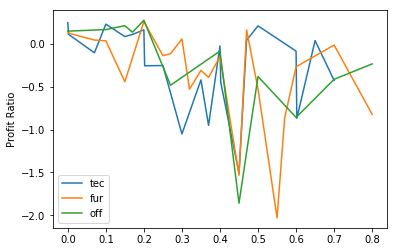

In [210]:
#plot of discount and average profit ratio
sns.lineplot(retail_tec_df['Discount'].unique(), retail_tec_df.groupby('Discount')['Profit Ratio'].mean(), label='tec')
sns.lineplot(retail_fur_df['Discount'].unique(), retail_fur_df.groupby('Discount')['Profit Ratio'].mean(), label='fur')
sns.lineplot(retail_off_df['Discount'].unique(), retail_off_df.groupby('Discount')['Profit Ratio'].mean(), label='off')

##Discount vs Gross Profit

/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


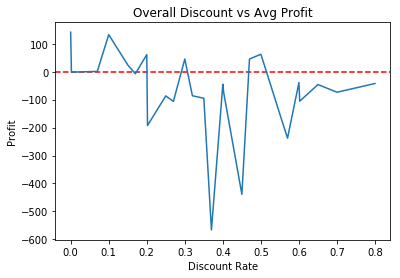

In [211]:
#plot of discount and overall gross profit ratio
plt.xlabel('Discount Rate')
plt.title('Overall Discount vs Avg Profit')

plt.axes().axhline(0, ls='--', color='R')

sns.lineplot(retail_df['Discount'].unique(), retail_df.groupby('Discount')['Profit'].mean())
plt.savefig('Discount vs Gross Profit OVerall.png', dpi=300, bbox_inches = "tight")


/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


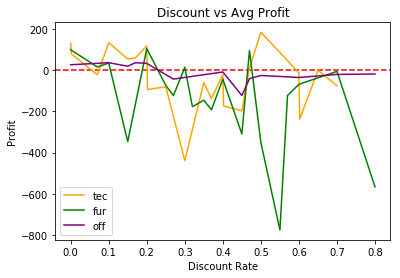

In [212]:
#plot of discount and gross profit ratio for all categories
plt.xlabel('Discount Rate')
plt.title('Discount vs Avg Profit')

plt.axes().axhline(0, ls='--', color='R')

sns.lineplot(retail_tec_df['Discount'].unique(), retail_tec_df.groupby('Discount')['Profit'].mean(), label='tec',color='Orange')
sns.lineplot(retail_fur_df['Discount'].unique(), retail_fur_df.groupby('Discount')['Profit'].mean(), label='fur', color='Green')
sns.lineplot(retail_off_df['Discount'].unique(), retail_off_df.groupby('Discount')['Profit'].mean(), label='off', color='Purple')

plt.savefig('Discount vs Gross Profit Categories.png', dpi=300, bbox_inches = "tight")


##Discount vs Quantity

In [213]:
retail_tec_df.groupby('Discount')['Quantity'].mean()

Discount
0.000    3.432844
0.002    3.516556
0.070    3.406250
0.100    3.853211
0.150    3.861314
0.170    3.392857
0.200    3.622222
0.202    3.909091
0.250    3.730769
0.300    2.000000
0.350    4.000000
0.370    3.000000
0.400    3.485944
0.402    3.297297
0.450    4.250000
0.470    4.571429
0.500    3.710526
0.600    2.368421
0.602    3.600000
0.650    3.833333
0.700    2.678571
Name: Quantity, dtype: float64

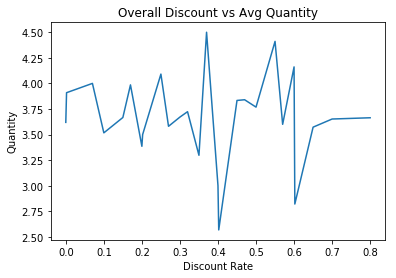

In [214]:
#plot of discount and total number of sales
plt.xlabel('Discount Rate')
plt.title('Overall Discount vs Avg Quantity')

sns.lineplot(retail_df['Discount'].unique(), retail_df.groupby('Discount')['Quantity'].mean())

plt.savefig('Discount vs Quantity Overall.png', dpi=300, bbox_inches = "tight")


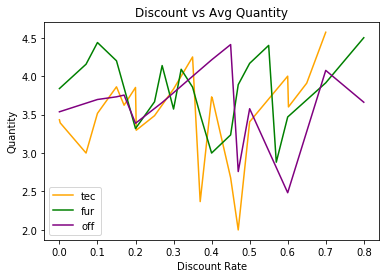

In [215]:
#plot of discount and total number of sales for all categories
plt.xlabel('Discount Rate')
plt.title('Discount vs Avg Quantity')

sns.lineplot(retail_tec_df['Discount'].unique(), retail_tec_df.groupby('Discount')['Quantity'].mean(), label='tec',color='Orange')
sns.lineplot(retail_fur_df['Discount'].unique(), retail_fur_df.groupby('Discount')['Quantity'].mean(), label='fur', color='Green')
sns.lineplot(retail_off_df['Discount'].unique(), retail_off_df.groupby('Discount')['Quantity'].mean(), label='off', color='Purple')

plt.savefig('Discount vs Quantity Categories.png', dpi=300, bbox_inches = "tight")


# Ridge Regression

## Tec

In [0]:
tec_data_df = retail_tec_df[['Sales',	'Quantity',	'Discount','Profit']]

In [0]:
X_tec = tec_data_df[['Sales',	'Quantity',	'Discount']]
y_tec = tec_data_df['Profit']

In [0]:
X_tec_rest, X_tec_test, y_tec_rest, y_tec_test = train_test_split(X_tec, y_tec, test_size = 0.2, random_state = 42)
X_tec_train, X_tec_val, y_tec_train, y_tec_val = train_test_split(X_tec_rest, y_tec_rest, test_size = 0.25, random_state = 42)

In [0]:
#scale
#set scaler object
scaler_tec = StandardScaler()
#fit
scaler_tec.fit(X_tec_train)

#transform
X_tec_train_scale = scaler_tec.transform(X_tec_train)
X_tec_test_scale = scaler_tec.transform(X_tec_test)
X_tec_val_scale = scaler_tec.transform(X_tec_val)

###Finding alpha values

In [0]:
alpha_range = np.power(10, [float(number) for number in range(-5,6)])

In [0]:
ridge_tec_r2_train = []
ridge_tec_r2_val = []

ridge_tec_mse_train = []
ridge_tec_mse_val = []

In [0]:
for alpha_num in alpha_range:
  #create ridge model
  ridge_model = Ridge(alpha = alpha_num, random_state = 42)
  #fit object
  ridge_model.fit(X_tec_train_scale, y_tec_train)
  
  #r2 train and test score
  ridge_tec_r2_train.append(ridge_model.score(X_tec_train_scale, y_tec_train))
  ridge_tec_r2_val.append(ridge_model.score(X_tec_val_scale, y_tec_val))
  
  #mse train and test score
  ridge_tec_mse_train.append(mean_squared_error(y_tec_train, ridge_model.predict(X_tec_train_scale)))
  ridge_tec_mse_val.append(mean_squared_error(y_tec_val, ridge_model.predict(X_tec_val_scale)))  

Text(0, 0.5, 'R2 Values')

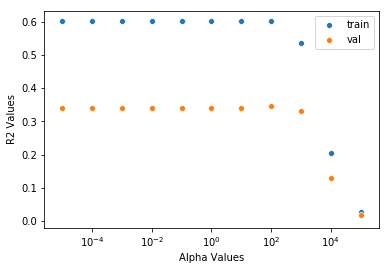

In [288]:
plt.xscale('log')

sns.scatterplot(alpha_range, ridge_tec_r2_train, label='train')
sns.scatterplot(alpha_range, ridge_tec_r2_val, label='val')

plt.xlabel('Alpha Values')
plt.ylabel('R2 Values')

Text(0, 0.5, 'MSE Values')

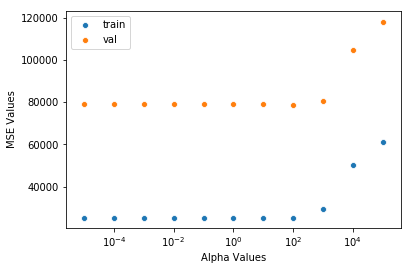

In [289]:
plt.xscale('log')

sns.scatterplot(alpha_range, ridge_tec_mse_train, label = 'train')
sns.scatterplot(alpha_range, ridge_tec_mse_val, label = 'val')

plt.xlabel('Alpha Values')
plt.ylabel('MSE Values')

### Final

In [0]:
#use pipeline to fit models
scaler_tec_final = StandardScaler()
ridge_tec_final = Ridge(alpha = 100)

#create a pipeline
scaler_tec_ridge_pipe_final = Pipeline(steps = [('scaler',scaler_tec_final), ('ridge',ridge_tec_final)],verbose=True)

In [291]:
scaler_tec_ridge_pipe_final.fit(X_tec_train, y_tec_train)

[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ............. (step 2 of 2) Processing ridge, total=   0.0s


Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('ridge',
                 Ridge(alpha=100, copy_X=True, fit_intercept=True,
                       max_iter=None, normalize=False, random_state=None,
                       solver='auto', tol=0.001))],
         verbose=True)

In [0]:
y_tec_train_pipe_predict = scaler_tec_ridge_pipe_final.predict(X_tec_train)
y_tec_test_pipe_predict = scaler_tec_ridge_pipe_final.predict(X_tec_test)

In [293]:
y_tec_train_pipe_predict

array([ 165.51366155,   28.08875448, -205.7920182 , ...,   30.2599587 ,
         97.93449567,   18.68001207])

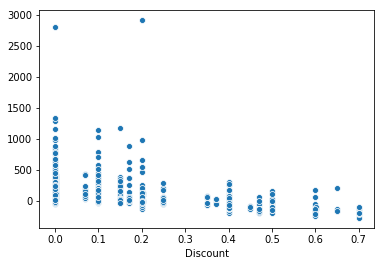

In [294]:
sns.scatterplot(X_tec_train['Discount'], y_tec_train_pipe_predict)

## Fur

In [0]:
fur_data_df = retail_fur_df[['Sales',	'Quantity',	'Discount',	'Profit']]

In [0]:
X_fur = fur_data_df[['Sales',	'Quantity',	'Discount']]
y_fur = fur_data_df['Profit']

In [0]:
X_fur_rest, X_fur_test, y_fur_rest, y_fur_test = train_test_split(X_fur, y_fur, test_size = 0.2, random_state = 42)
X_fur_train, X_fur_val, y_fur_train, y_fur_val = train_test_split(X_fur_rest, y_fur_rest, test_size = 0.25, random_state = 42)

In [0]:
#scale
#set scaler object
scaler_fur = StandardScaler()
#fit
scaler_fur.fit(X_fur_train)

#transform
X_fur_train_scale = scaler_tec.transform(X_fur_train)
X_fur_test_scale = scaler_tec.transform(X_fur_test)
X_fur_val_scale = scaler_tec.transform(X_fur_val)

###Finding alpha values

In [0]:
alpha_range = np.power(10, [float(number) for number in range(-5,6)])

In [0]:
ridge_fur_r2_train = []
ridge_fur_r2_val = []

ridge_fur_mse_train = []
ridge_fur_mse_val = []

In [0]:
for alpha_num in alpha_range:
  #create ridge model
  ridge_model = Ridge(alpha = alpha_num, random_state = 42)
  #fit object
  ridge_model.fit(X_fur_train_scale, y_fur_train)
  
  #r2 train and test score
  ridge_fur_r2_train.append(ridge_model.score(X_fur_train_scale, y_fur_train))
  ridge_fur_r2_val.append(ridge_model.score(X_fur_val_scale, y_fur_val))
  
  #mse train and test score
  ridge_fur_mse_train.append(mean_squared_error(y_fur_train, ridge_model.predict(X_fur_train_scale)))
  ridge_fur_mse_val.append(mean_squared_error(y_fur_val, ridge_model.predict(X_fur_val_scale)))  

Text(0, 0.5, 'R2 Values')

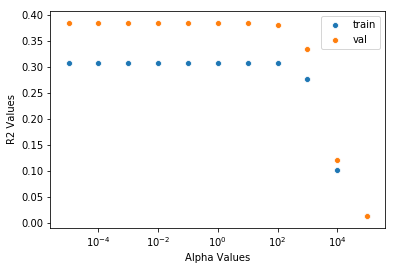

In [318]:
plt.xscale('log')

sns.scatterplot(alpha_range, ridge_fur_r2_train, label='train')
sns.scatterplot(alpha_range, ridge_fur_r2_val, label='val')

plt.xlabel('Alpha Values')
plt.ylabel('R2 Values')

Text(0, 0.5, 'MSE Values')

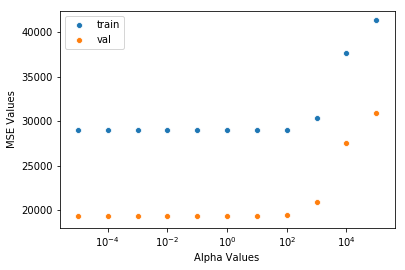

In [319]:
plt.xscale('log')

sns.scatterplot(alpha_range, ridge_fur_mse_train, label = 'train')
sns.scatterplot(alpha_range, ridge_fur_mse_val, label = 'val')

plt.xlabel('Alpha Values')
plt.ylabel('MSE Values')

### Final

In [0]:
#use pipeline to fit models
scaler_fur_final = StandardScaler()
ridge_fur_final = Ridge(alpha = 100)

#create a pipeline
scaler_fur_ridge_pipe_final = Pipeline(steps = [('scaler',scaler_fur_final), ('ridge',ridge_fur_final)],verbose=True)

In [321]:
scaler_fur_ridge_pipe_final.fit(X_fur_train, y_fur_train)

[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ............. (step 2 of 2) Processing ridge, total=   0.0s


Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('ridge',
                 Ridge(alpha=100, copy_X=True, fit_intercept=True,
                       max_iter=None, normalize=False, random_state=None,
                       solver='auto', tol=0.001))],
         verbose=True)

In [0]:
y_fur_train_pipe_predict = scaler_fur_ridge_pipe_final.predict(X_fur_train)
y_fur_test_pipe_predict = scaler_fur_ridge_pipe_final.predict(X_fur_test)

In [323]:
y_tec_train_pipe_predict

array([ 165.51366155,   28.08875448, -205.7920182 , ...,   30.2599587 ,
         97.93449567,   18.68001207])

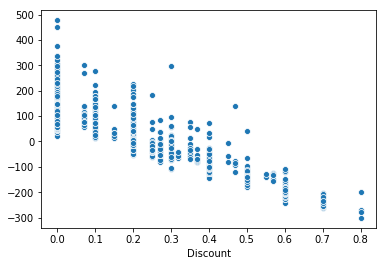

In [324]:
sns.scatterplot(X_fur_train['Discount'], y_fur_train_pipe_predict)

## Off

In [0]:
off_data_df = retail_off_df[['Sales',	'Quantity',	'Discount','Profit']]

In [0]:
X_off = off_data_df[['Sales',	'Quantity',	'Discount']]
y_off = off_data_df['Profit']

In [0]:
X_off_rest, X_off_test, y_off_rest, y_off_test = train_test_split(X_off, y_off, test_size = 0.2, random_state = 42)
X_off_train, X_off_val, y_off_train, y_off_val = train_test_split(X_off_rest, y_off_rest, test_size = 0.25, random_state = 42)

In [0]:
#scale
#set scaler object
scaler_off = StandardScaler()
#fit
scaler_off.fit(X_off_train)

#transform
X_off_train_scale = scaler_tec.transform(X_off_train)
X_off_test_scale = scaler_tec.transform(X_off_test)
X_off_val_scale = scaler_tec.transform(X_off_val)

###Finding alpha values

In [0]:
alpha_range = np.power(10, [float(number) for number in range(-5,6)])

In [0]:
ridge_off_r2_train = []
ridge_off_r2_val = []

ridge_off_mse_train = []
ridge_off_mse_val = []

In [0]:
for alpha_num in alpha_range:
  #create ridge model
  ridge_model = Ridge(alpha = alpha_num, random_state = 42)
  #fit object
  ridge_model.fit(X_fur_train_scale, y_fur_train)
  
  #r2 train and test score
  ridge_off_r2_train.append(ridge_model.score(X_off_train_scale, y_off_train))
  ridge_off_r2_val.append(ridge_model.score(X_off_val_scale, y_off_val))
  
  #mse train and test score
  ridge_off_mse_train.append(mean_squared_error(y_off_train, ridge_model.predict(X_off_train_scale)))
  ridge_off_mse_val.append(mean_squared_error(y_off_val, ridge_model.predict(X_off_val_scale)))  

Text(0, 0.5, 'R2 Values')

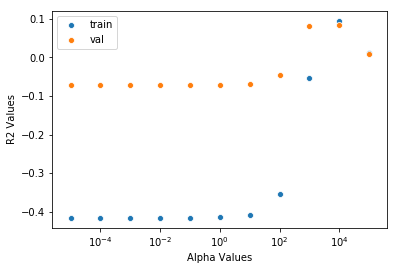

In [332]:
plt.xscale('log')

sns.scatterplot(alpha_range, ridge_off_r2_train, label='train')
sns.scatterplot(alpha_range, ridge_off_r2_val, label='val')

plt.xlabel('Alpha Values')
plt.ylabel('R2 Values')

Text(0, 0.5, 'MSE Values')

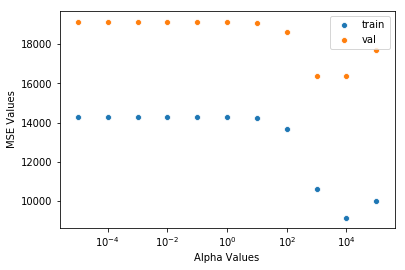

In [333]:
plt.xscale('log')

sns.scatterplot(alpha_range, ridge_off_mse_train, label = 'train')
sns.scatterplot(alpha_range, ridge_off_mse_val, label = 'val')

plt.xlabel('Alpha Values')
plt.ylabel('MSE Values')

### Final

In [0]:
#use pipeline to fit models
scaler_off_final = StandardScaler()
ridge_off_final = Ridge(alpha = 100)

#create a pipeline
scaler_off_ridge_pipe_final = Pipeline(steps = [('scaler',scaler_off_final), ('ridge',ridge_off_final)],verbose=True)

In [335]:
scaler_off_ridge_pipe_final.fit(X_off_train, y_off_train)

[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ............. (step 2 of 2) Processing ridge, total=   0.0s


Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('ridge',
                 Ridge(alpha=100, copy_X=True, fit_intercept=True,
                       max_iter=None, normalize=False, random_state=None,
                       solver='auto', tol=0.001))],
         verbose=True)

In [0]:
y_off_train_pipe_predict = scaler_off_ridge_pipe_final.predict(X_off_train)
y_off_test_pipe_predict = scaler_off_ridge_pipe_final.predict(X_off_test)

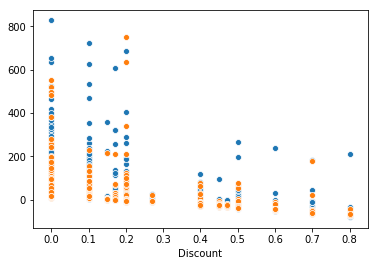

In [337]:
sns.scatterplot(X_off_train['Discount'], y_off_train_pipe_predict)
sns.scatterplot(X_off_test['Discount'], y_off_test_pipe_predict)

#Biggest losses

In [0]:
retail_df1 = retail_df['Product ID'].value_counts()>=0

In [0]:
retail_df1 = retail_df1.reset_index()

In [0]:
retail_df1 = retail_df1[retail_df1['Product ID']==True]['index']

In [0]:
retail_df1 = retail_df[retail_df['Product ID'].isin(retail_df1)]

In [0]:
biggest_loss = retail_df1.groupby('Product ID')['Profit'].sum().sort_values().head(10)

In [0]:
biggest_loss = biggest_loss.reset_index()['Product ID']

In [0]:
biggest_loss_df = retail_df[retail_df['Product ID'].isin(biggest_loss)]

In [348]:
biggest_loss_df.sort_values('Product ID')

,Row ID,Order Date,Country,Market,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,CoGS,Profit Ratio,Discount Amount,Indv Sale,Unit Price,Profit Margin
245,46219,2018-01-28,Lithuania,EMEA,FUR-BAR-10003532,Furniture,Tables,"Barricks Conference Table, Rectangular",2171.160,8,0.7,-2750.2800,4921.4400,-1.27,5066.04,271.40,615.1800,0.470572
15808,45920,2018-12-26,Turkey,EMEA,FUR-BEV-10002193,Furniture,Tables,"Bevis Round Table, Adjustable Height",1248.912,6,0.6,-1779.7680,3028.6800,-1.43,1873.37,208.15,504.7800,0.030895
1436,15043,2018-02-07,Sweden,EU,FUR-BO-10002003,Furniture,Bookcases,"Sauder Classic Bookcase, Metal",2830.425,13,0.5,-1981.3950,4811.8200,-0.70,2830.42,217.73,370.1400,0.176474
10139,20286,2018-09-17,United Kingdom,EU,FUR-BO-10002003,Furniture,Bookcases,"Sauder Classic Bookcase, Metal",870.900,2,0.0,130.6200,740.2800,0.15,0.00,435.45,370.1400,0.176447
2945,26684,2018-05-23,Pakistan,APAC,FUR-TA-10002172,Furniture,Tables,"Hon Conference Table, Rectangular",1286.670,7,0.8,-2380.3500,3667.0200,-1.85,5146.68,183.81,523.8600,0.754381
6064,8239,2018-09-30,Honduras,LATAM,FUR-TA-10002885,Furniture,Tables,"Lesro Computer Table, Fully Assembled",257.004,3,0.7,-599.6760,856.6800,-2.33,599.68,85.67,285.5600,0.000023
11327,5064,2018-09-09,Honduras,LATAM,FUR-TA-10002885,Furniture,Tables,"Lesro Computer Table, Fully Assembled",599.676,7,0.7,-1399.2440,1998.9200,-2.33,1399.24,85.67,285.5600,0.000023
2205,17873,2018-07-30,Sweden,EU,FUR-TA-10003354,Furniture,Tables,"Barricks Conference Table, Adjustable Height",1363.905,5,0.7,-1864.0950,3228.0000,-1.37,3182.44,272.78,645.6000,0.408406
839,25705,2018-01-18,Pakistan,APAC,OFF-AP-10003963,Office Supplies,Appliances,"Breville Microwave, Silver",2117.220,14,0.5,-1736.2800,3853.5000,-0.82,2117.22,151.23,275.2500,0.098856
3116,27884,2018-01-07,Australia,APAC,OFF-AP-10003963,Office Supplies,Appliances,"Breville Microwave, Silver",3810.996,14,0.1,-42.5040,3853.5000,-0.01,423.44,272.21,275.2500,0.098839


#Profit Margins

In [376]:
retail_df[retail_df['Profit Margin']< retail_df['Discount']]

,Row ID,Order Date,Country,Market,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,CoGS,Profit Ratio,Discount Amount,Indv Sale,Unit Price,Profit Margin
37,31980,2018-11-05,United States,US,TEC-MA-10004125,Technology,Machines,Cubify CubeX 3D Printer Triple Head Print,7999.9800,4,0.500,-3839.9904,11839.9704,-0.48,7999.98,2000.00,2959.9926,0.351355
83,38540,2018-08-18,United States,US,FUR-CH-10002024,Furniture,Chairs,HON 5400 Series Task Chairs for Big and Tall,4416.1740,9,0.300,-630.8820,5047.0560,-0.14,1892.65,490.69,560.7840,0.250010
124,13646,2018-03-18,France,EU,TEC-CO-10004099,Technology,Copiers,"Sharp Fax Machine, Digital",1505.9790,6,0.150,-265.7610,1771.7400,-0.18,265.76,251.00,295.2900,0.000014
203,28875,2018-06-10,Philippines,APAC,OFF-AP-10001824,Office Supplies,Appliances,"Breville Stove, Silver",1433.8395,3,0.150,-84.3705,1518.2100,-0.06,253.03,477.95,506.0700,0.111099
232,33100,2018-09-23,United States,US,OFF-SU-10002881,Office Supplies,Supplies,Martin Yale Chadless Opener Electric Letter Op...,4663.7360,7,0.200,-1049.3406,5713.0766,-0.22,1165.93,666.25,816.1538,0.020411
245,46219,2018-01-28,Lithuania,EMEA,FUR-BAR-10003532,Furniture,Tables,"Barricks Conference Table, Rectangular",2171.1600,8,0.700,-2750.2800,4921.4400,-1.27,5066.04,271.40,615.1800,0.470572
305,33831,2018-08-16,United States,US,OFF-ST-10004459,Office Supplies,Storage,Tennsco Single-Tier Lockers,1801.6320,6,0.200,-337.8060,2139.4380,-0.19,450.41,300.27,356.5730,0.052625
312,4027,2018-04-21,Guatemala,LATAM,TEC-CO-10003931,Technology,Copiers,"Hewlett Fax Machine, High-Speed",1058.2792,5,0.002,-2.1208,1060.4000,-0.00,2.12,211.66,212.0800,0.000020
316,11657,2018-11-26,France,EU,OFF-AP-10000540,Office Supplies,Appliances,"Hamilton Beach Refrigerator, Red",3150.8190,7,0.100,-35.0910,3185.9100,-0.01,350.09,450.12,455.1300,0.098880
324,27129,2018-11-13,Philippines,APAC,FUR-CH-10000602,Furniture,Chairs,"Novimex Executive Leather Armchair, Red",1725.7500,5,0.250,-483.3000,2209.0500,-0.28,575.25,345.15,441.8100,0.041624


In [352]:
retail_df.groupby('Category')['Profit Margin'].mean()

Category
Furniture          0.378750
Office Supplies    0.451848
Technology         0.381428
Name: Profit Margin, dtype: float64

In [353]:
retail_df.groupby('Category')['Profit Margin'].var()

Category
Furniture          0.069488
Office Supplies    0.095417
Technology         0.075096
Name: Profit Margin, dtype: float64

In [354]:
retail_df.groupby('Category')['Discount'].mean()

Category
Furniture          0.166815
Office Supplies    0.139715
Technology         0.131609
Name: Discount, dtype: float64

In [355]:
retail_df.sort_values('Profit Margin').head(20)

,Row ID,Order Date,Country,Market,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,CoGS,Profit Ratio,Discount Amount,Indv Sale,Unit Price,Profit Margin
43377,5372,2018-10-24,Panama,LATAM,OFF-LA-10004318,Office Supplies,Labels,"Hon Color Coded Labels, Adjustable",17.1360,4,0.40,-11.4240,28.56,-0.67,11.42,4.28,7.14,-0.000934
41349,51243,2018-12-30,Nigeria,Africa,OFF-BIN-10004512,Office Supplies,Art,"Binney & Smith Pens, Easy-Erase",21.9780,6,0.70,-51.2820,73.26,-2.33,51.28,3.66,12.21,-0.000819
50416,44210,2018-11-13,Turkey,EMEA,OFF-BIN-10004512,Office Supplies,Art,"Binney & Smith Pens, Easy-Erase",4.8840,1,0.60,-7.3260,12.21,-1.50,7.33,4.88,12.21,-0.000819
50209,41704,2018-10-03,Turkey,EMEA,OFF-BIN-10004512,Office Supplies,Art,"Binney & Smith Pens, Easy-Erase",4.8840,1,0.60,-7.3260,12.21,-1.50,7.33,4.88,12.21,-0.000819
30937,20067,2018-06-13,Sweden,EU,OFF-AR-10000505,Office Supplies,Art,"Binney & Smith Pens, Easy-Erase",42.7350,7,0.50,-42.7350,85.47,-1.00,42.74,6.10,12.21,-0.000819
44940,10275,2018-11-20,Brazil,LATAM,FUR-FU-10003725,Furniture,Furnishings,"Advantus Light Bulb, Erganomic",14.9520,3,0.60,-22.4280,37.38,-1.50,22.43,4.98,12.46,-0.000803
44941,281,2018-11-20,Brazil,LATAM,FUR-FU-10004842,Furniture,Furnishings,"Advantus Light Bulb, Erganomic",14.9520,3,0.60,-22.4280,37.38,-1.50,22.43,4.98,12.46,-0.000803
37558,26865,2018-11-20,Australia,APAC,OFF-LA-10003678,Office Supplies,Labels,"Hon Round Labels, 5000 Label Set",44.4150,7,0.10,-4.9350,49.35,-0.11,4.93,6.34,7.05,-0.000788
48098,29873,2018-11-28,Indonesia,APAC,OFF-LA-10004398,Office Supplies,Labels,"Hon Color Coded Labels, Alphabetical",13.3878,2,0.47,-11.8722,25.26,-0.89,11.87,6.69,12.63,-0.000583
48996,10131,2018-10-29,Brazil,LATAM,OFF-BI-10000631,Office Supplies,Binders,"Wilson Jones 3-Hole Punch, Economy",7.4640,1,0.60,-11.1960,18.66,-1.50,11.20,7.46,18.66,-0.000536


In [370]:
retail_tec_df.sort_values('Profit Margin')

,Row ID,Order Date,Country,Market,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,CoGS,Profit Ratio,Discount Amount,Indv Sale,Unit Price,Profit Margin
29277,40154,2018-10-14,United States,US,TEC-PH-10003187,Technology,Phones,Anker Astro Mini 3000mAh Ultra-Compact Portabl...,31.9840,2,0.200,-7.9960,39.980,-0.25,8.00,15.99,19.990,-1.250625e-04
34524,2505,2018-12-11,Venezuela,LATAM,TEC-AC-10001055,Technology,Accessories,"Enermax Numeric Keypad, Bluetooth",68.7960,3,0.400,-45.8640,114.660,-0.67,45.86,22.93,38.220,-8.721437e-05
19161,6063,2018-06-18,Honduras,LATAM,TEC-PH-10002332,Technology,Phones,"Motorola Audio Dock, VoIP",138.7680,2,0.400,-92.5120,231.280,-0.67,92.51,69.38,115.640,-5.765018e-05
28974,24313,2018-12-05,Australia,APAC,TEC-MA-10002242,Technology,Machines,"StarTech Calculator, Durable",108.2160,3,0.100,-12.0240,120.240,-0.11,12.02,36.07,40.080,-5.544467e-05
10303,3892,2018-12-26,Panama,LATAM,TEC-AC-10004626,Technology,Accessories,"Belkin Router, Erganomic",513.1200,5,0.400,-342.0800,855.200,-0.67,342.08,102.62,171.040,-3.897724e-05
6975,15970,2018-11-01,Germany,EU,TEC-CO-10002769,Technology,Copiers,"HP Fax Machine, Digital",539.2440,2,0.100,-59.9160,599.160,-0.11,59.92,269.62,299.580,-7.417792e-06
2713,21242,2018-12-01,Indonesia,APAC,TEC-CO-10000208,Technology,Copiers,"Brother Wireless Fax, Color",1414.5300,4,0.070,-106.4700,1521.000,-0.08,106.47,353.63,380.250,-7.069486e-06
31214,38840,2018-12-03,United States,US,TEC-PH-10004833,Technology,Phones,Macally Suction Cup Mount,57.3600,6,0.200,-14.3400,71.700,-0.25,14.34,9.56,11.950,-1.486491e-16
1506,8612,2018-11-26,Mexico,LATAM,TEC-PH-10002332,Technology,Phones,"Motorola Audio Dock, VoIP",578.2000,5,0.000,0.0000,578.200,0.00,0.00,115.64,115.640,-1.228887e-16
14310,21598,2018-07-31,Australia,APAC,TEC-CO-10003819,Technology,Copiers,"Sharp Copy Machine, High-Speed",287.2800,2,0.400,-191.5200,478.800,-0.67,191.52,143.64,239.400,-1.187206e-16


In [371]:
retail_fur_df.sort_values('Profit Margin')

,Row ID,Order Date,Country,Market,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,CoGS,Profit Ratio,Discount Amount,Indv Sale,Unit Price,Profit Margin
44941,281,2018-11-20,Brazil,LATAM,FUR-FU-10004842,Furniture,Furnishings,"Advantus Light Bulb, Erganomic",14.9520,3,0.60,-22.4280,37.380,-1.50,22.43,4.98,12.460,-8.025682e-04
44940,10275,2018-11-20,Brazil,LATAM,FUR-FU-10003725,Furniture,Furnishings,"Advantus Light Bulb, Erganomic",14.9520,3,0.60,-22.4280,37.380,-1.50,22.43,4.98,12.460,-8.025682e-04
37811,44730,2018-09-12,Nigeria,Africa,FUR-OFF-10002511,Furniture,Chairs,"Office Star Steel Folding Chair, Black",26.7840,1,0.70,-62.4960,89.280,-2.33,62.50,26.78,89.280,-1.493429e-04
14004,9117,2018-11-10,Panama,LATAM,FUR-BO-10000148,Furniture,Bookcases,"Bush 3-Shelf Cabinet, Metal",171.3960,3,0.40,-114.2640,285.660,-0.67,114.26,57.13,95.220,-3.500665e-05
15369,10820,2018-12-11,France,EU,FUR-CH-10003249,Furniture,Chairs,"Office Star Steel Folding Chair, Black",241.0560,3,0.10,-26.7840,267.840,-0.11,26.78,80.35,89.280,-2.489048e-05
15861,8022,2018-08-08,Dominican Republic,LATAM,FUR-CH-10004277,Furniture,Chairs,"SAFCO Swivel Stool, Black",264.8160,3,0.20,-66.2040,331.020,-0.25,66.20,88.27,110.340,-2.265724e-05
821,22458,2018-12-20,Philippines,APAC,FUR-CH-10003846,Furniture,Chairs,"Office Star Swivel Stool, Set of Two",1189.2825,9,0.25,-396.4275,1585.710,-0.33,396.43,132.14,176.190,-1.891897e-05
12816,26533,2018-11-12,Australia,APAC,FUR-CH-10003846,Furniture,Chairs,"Office Star Swivel Stool, Set of Two",317.1420,2,0.10,-35.2380,352.380,-0.11,35.24,158.57,176.190,-6.306323e-06
2284,13234,2018-08-08,Spain,EU,FUR-CH-10000969,Furniture,Chairs,"Hon Executive Leather Armchair, Red",1102.5360,3,0.20,-275.6340,1378.170,-0.25,275.63,367.51,459.390,-5.441999e-06
24690,13925,2018-09-18,France,EU,FUR-CH-10000969,Furniture,Chairs,"Hon Executive Leather Armchair, Red",413.4510,1,0.10,-45.9390,459.390,-0.11,45.94,413.45,459.390,-2.418666e-06


In [0]:
retail_off_df.sort_values('Profit Margin')

In [379]:
retail_df.groupby(['Sub-Category','Category'])['Profit Margin'].mean().sort_values()

Sub-Category  Category       
Tables        Furniture          0.319892
Storage       Office Supplies    0.349833
Chairs        Furniture          0.350764
Phones        Technology         0.367856
Bookcases     Furniture          0.370776
Machines      Technology         0.372260
Supplies      Office Supplies    0.374270
Appliances    Office Supplies    0.389839
Copiers       Technology         0.390838
Accessories   Technology         0.393643
Art           Office Supplies    0.403201
Fasteners     Office Supplies    0.430504
Furnishings   Furniture          0.431597
Envelopes     Office Supplies    0.463658
Labels        Office Supplies    0.478304
Binders       Office Supplies    0.531107
Paper         Office Supplies    0.603414
Name: Profit Margin, dtype: float64

In [384]:
retail_df.groupby(['Sub-Category'])['Quantity'].sum().sort_values()

Sub-Category
Tables         1027
Machines       1734
Appliances     2102
Copiers        2642
Envelopes      2730
Fasteners      2879
Bookcases      2910
Supplies       3038
Labels         3295
Furnishings    3695
Accessories    3720
Phones         3936
Chairs         4034
Paper          4107
Art            5634
Storage        5729
Binders        7410
Name: Quantity, dtype: int64

In [389]:
retail_df.groupby(['Sub-Category'])['Discount'].mean()

Sub-Category
Accessories    0.117270
Appliances     0.139102
Art            0.123363
Binders        0.182112
Bookcases      0.154476
Chairs         0.162444
Copiers        0.115279
Envelopes      0.138439
Fasteners      0.151013
Furnishings    0.147241
Labels         0.120476
Machines       0.161293
Paper          0.105864
Phones         0.142487
Storage        0.135799
Supplies       0.131694
Tables         0.291203
Name: Discount, dtype: float64

In [390]:
retail_df['Profit'].sum()

504165.97046